### Distribution Visualization with barplot

In [2]:
import os
import shutil
from PIL import Image
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
root_dir = os.getcwd() + '/data_processing/'
with_mask_dir = root_dir + 'with_mask/'
without_mask_dir = root_dir + 'without_mask/'
irre_dir = root_dir + 'irrelevant/'
with_mask_resized_dir = root_dir + 'with_mask_resized/'
without_mask_resized_dir = root_dir + 'without_mask_resized/'
irre_resized_dir = root_dir + 'irrelevant_resized/'
data_dir = root_dir + 'data/'

In [4]:
data_dir = root_dir + 'data/'
train_set = root_dir + 'train_set/'
val_set = root_dir + 'val_set/'
test_set = root_dir + 'test_set/'
train_labels_file = root_dir + 'train_labels.pt'
val_labels_file = root_dir + 'val_labels.pt'
test_labels_file = root_dir + 'test_labels.pt'

In [5]:
def get_value(root, target_label_file):
    labels = torch.load(target_label_file)
    without_mask = with_mask = no_face = 0
    for i in range(len(labels)):
        label = labels[i].item()
        if label == 0:
            without_mask += 1
        elif label == 1:
            with_mask += 1
        elif label == 2:
            no_face += 1
    return [without_mask, with_mask, no_face]

train:
without masks:  7427
with masks:  4527
no faces:  1672
val:
without masks:  1563
with masks:  986
no faces:  370
test:
without masks:  1554
with masks:  1015
no faces:  350


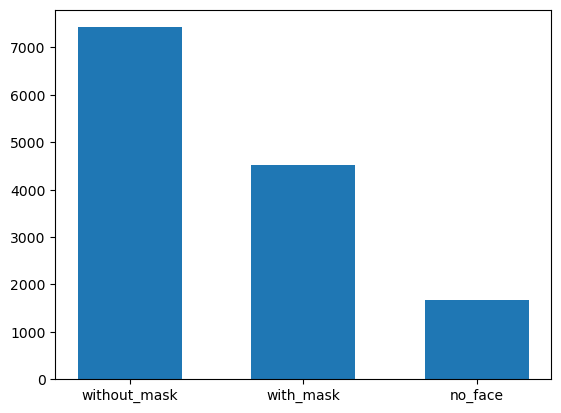

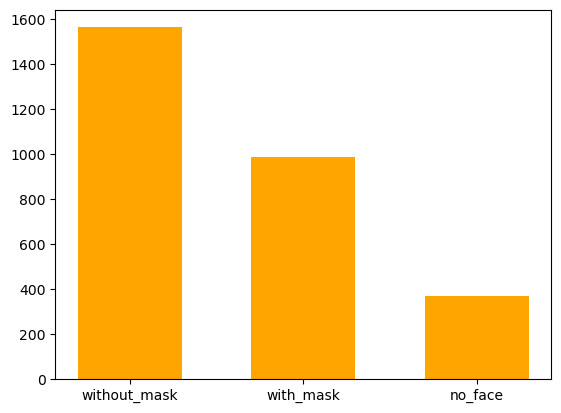

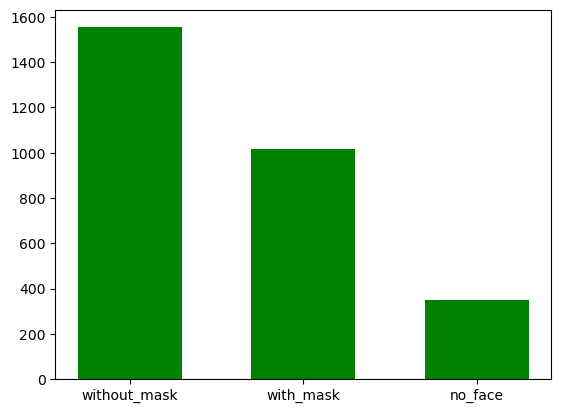

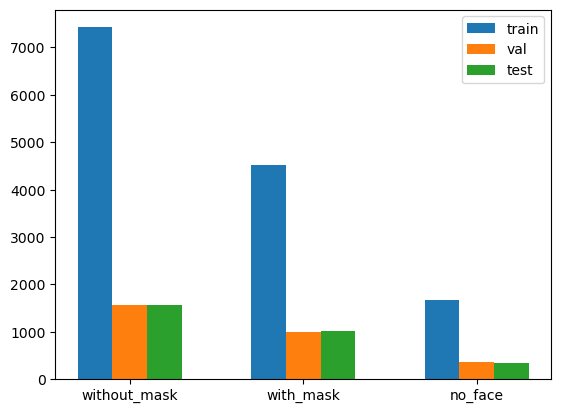

In [6]:
train = get_value(train_set, train_labels_file)
val = get_value(val_set, val_labels_file)
test = get_value(test_set, test_labels_file)
labels = ['without_mask', 'with_mask', 'no_face']

print("train:")
print("without masks: ", train[0])
print("with masks: ", train[1])
print("no faces: ", train[2])
print("val:")
print("without masks: ", val[0])
print("with masks: ", val[1])
print("no faces: ", val[2])
print("test:")
print("without masks: ", test[0])
print("with masks: ", test[1])
print("no faces: ", test[2])

plt.bar(range(len(train)), train, width=0.6, tick_label=labels)
plt.show()
plt.bar(range(len(val)), val, width=0.6, tick_label=labels, fc='orange')
plt.show()
plt.bar(range(len(test)), test, width=0.6, tick_label=labels, fc='g')
plt.show()

x = np.arange(len(train))
total_width, n = 0.6, 3
width = total_width / n
x = x - (total_width - width) / 2
 
plt.bar(x, train, width=width, label='train')
plt.bar(x + width, val, width=width, label='val')
plt.bar(x + 2 * width, test, width=width, label='test')
plt.xticks(x + width, labels)
plt.legend()
plt.show()

### Distribution Visualization with tSNE

We use tSNE to observe the distribution of the learned embeddings of the samples.

#### Environment setup

In [5]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd 
import torch
import numpy as np

#### Data preparation

We randomly select 1,600 samples to get their last-layer embeddings from the proposed model, as x; and their corresponding labels, as y.

In [31]:
x = np.load("./x2.npy")
x = torch.tensor(x)
x.shape

torch.Size([1600, 3])

In [34]:
y = np.load("./y2.npy")
y = torch.tensor(y)
y.shape

torch.Size([1600])

#### Clustering

In [39]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x) 

/Users/yuchen/opt/anaconda3/envs/CS5242/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/yuchen/opt/anaconda3/envs/CS5242/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1600 samples in 0.001s...
[t-SNE] Computed neighbors for 1600 samples in 0.038s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1600
[t-SNE] Computed conditional probabilities for sample 1600 / 1600
[t-SNE] Mean sigma: 0.168406
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.582733
[t-SNE] KL divergence after 1000 iterations: 1.002931


#### Plotting

[Text(0.5, 1.0, 'random data')]

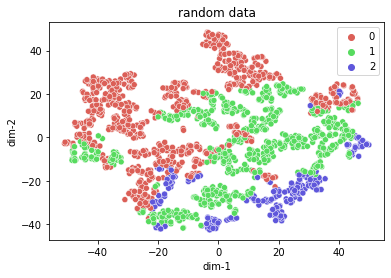

In [42]:
df = pd.DataFrame()
df["y"] = y
df["dim-1"] = z[:,0]
df["dim-2"] = z[:,1]

sns.scatterplot(x="dim-1", y="dim-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 3),
                data=df).set(title="random data") 